# Importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins.csv")

# Preprocesing data

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

We can see that each row is missing at least 2 values. we will delete all rows with all values Null (nothing will be lost)

In [ ]:
df = df.drop(labels = df.index[df.isnull().all(1)], axis=0)

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [ ]:
print(df['sex'].value_counts())

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64


there is one sex value equal to dot. We will remove data like this

In [ ]:
df = df.drop(labels = df.index[df['sex']=='.'], axis=0)

In [ ]:
print(df['sex'].value_counts())

MALE      169
FEMALE    165
Name: sex, dtype: int64


In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


Also we will remove all rows with sex value set to null as it is hard to put a mean value and 7 elements won't make much difference on 341 data entries.

In [ ]:
df = df[df["sex"].notnull()]

In [ ]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Perfect! No data is equal to Null

## Looking for outlires

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629
std,5.461540,1.973277,263.648447,804.009294
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4768.750000
max,59.600000,21.500000,5000.000000,6300.000000


We can see that some flipper length is set to negative value, we need to delete this. Also 75% of flipper lenghts are smaller than 213 and one is greater than 5000, we also need to remove this, as outlires like these might affect our model precision

In [ ]:
df[df['flipper_length_mm']<0].sum()
df = df[(df['flipper_length_mm'] > 0)]
df = df[(df['flipper_length_mm'] < 700)]
df = df[(df['body_mass_g'] < 6000)]

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,328.000000,328.000000,328.000000,328.000000
mean,43.921646,17.164939,200.704268,4183.536585
std,5.388485,1.967944,13.895450,783.692443
min,32.100000,13.100000,172.000000,2700.000000
25%,39.450000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4000.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,58.000000,21.500000,231.000000,5950.000000


In [ ]:
df.shape

(328, 5)

# Looking visually at data

## Ploting the distribution of data

Text(0.5, 1.0, 'Distribution of sex')

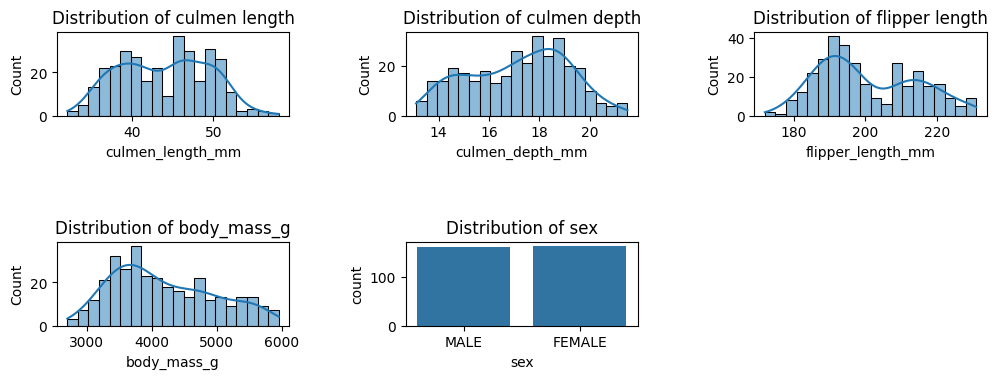

In [ ]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=1.5,wspace=0.5)

plt.subplot(5,3,1)
sns.histplot(df,x='culmen_length_mm',kde=True, bins=20)
plt.title("Distribution of culmen length")

plt.subplot(5,3,2)
sns.histplot(df,x='culmen_depth_mm',kde=True, bins=20)
plt.title("Distribution of culmen depth")

plt.subplot(5,3,3)
sns.histplot(df,x='flipper_length_mm',kde=True, bins=20)
plt.title("Distribution of flipper length")

plt.subplot(5,3,4)
sns.histplot(df,x='body_mass_g',kde=True, bins=20)
plt.title("Distribution of body_mass_g")

plt.subplot(5,3,5)
sns.countplot(df,x='sex')
plt.title("Distribution of sex")

## looking at distribution of mass among different sex spices

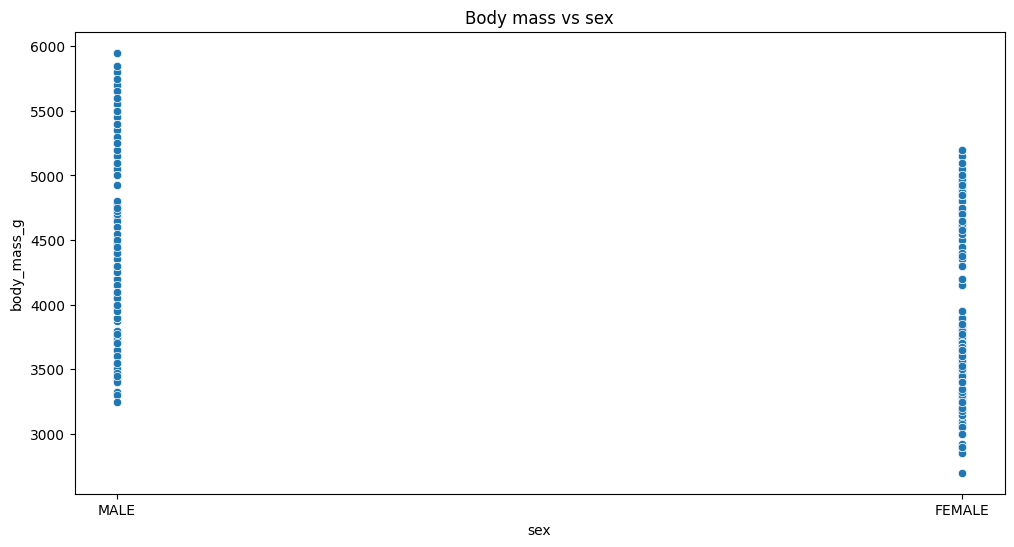

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df,x='sex',y='body_mass_g')
plt.title("Body mass vs sex")
plt.grid(False)
plt.show()

## Checking the mean flipper size for each sex

In [ ]:
df.groupby(['sex']).agg({'body_mass_g':['mean'],'flipper_length_mm':['mean']})

,body_mass_g,flipper_length_mm
,mean,mean
sex,,
FEMALE,3862.272727,197.363636
MALE,4508.742331,204.085890


### Encoding categorical data, sex in this case

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = df[['sex']].apply(le.fit_transform)

In [ ]:
df.head() # We can clearly see that Male -> 1 and Female -> 0

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


## Plotting the heatmap (Looking at correlations between different variables)

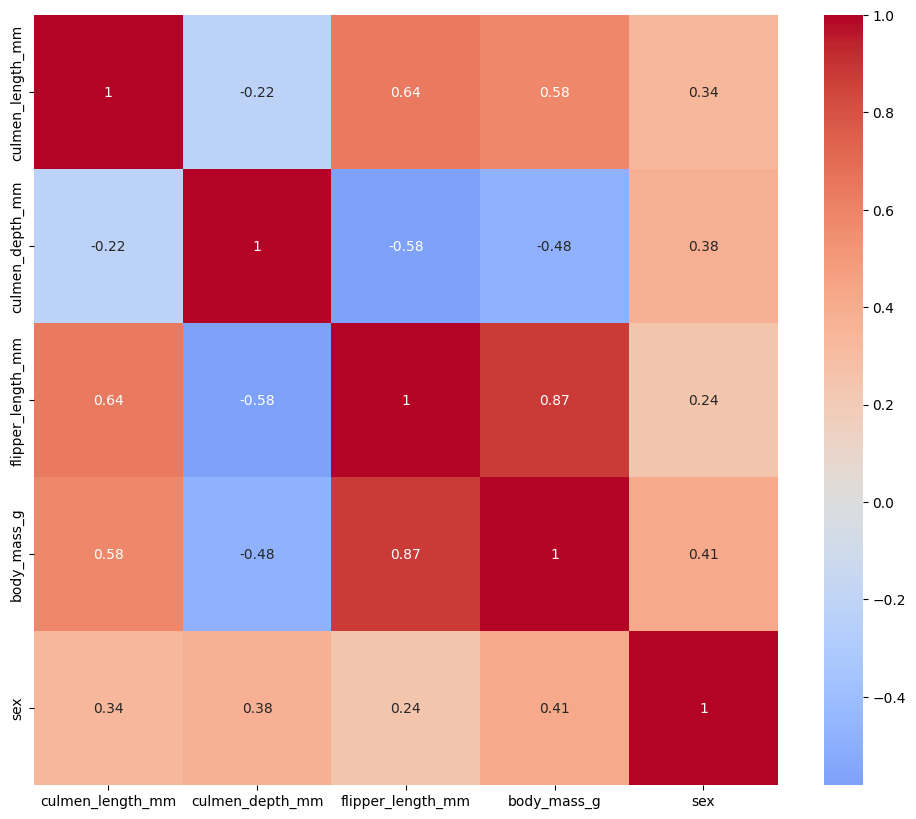

In [ ]:
corrmax = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corrmax,annot=True,cmap='coolwarm',center=0)
plt.show()

We can see that there is a really strong correlation between flipper length and body mass (0.87). Let's plot the scatterplot of these features

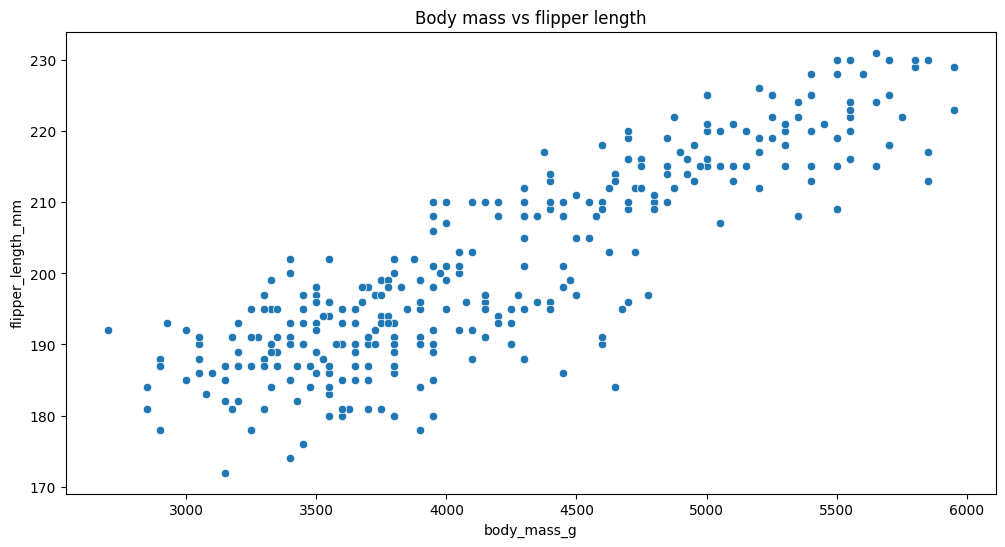


 Correlation: 0.8711725736183824


In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df,x='body_mass_g',y='flipper_length_mm')
plt.title("Body mass vs flipper length")
plt.grid(False)
plt.show()

print(f"\n Correlation: {df['flipper_length_mm'].corr(df['body_mass_g'])}")

# Creating Casting model

In [ ]:
df1 = df.copy()

## Scaling all the features

We want each variable to be equally important for out model, that's why we need to use **Standard Scaling** and make each value between <-3,3>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)
scaled_df1 = pd.DataFrame(sc.transform(df1),columns=df1.columns)

In [ ]:
scaled_df1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896173,0.781225,-1.420204,-0.554043,1.006116
1,-0.821827,0.119627,-1.059824,-0.490145,-0.993921
2,-0.673135,0.424980,-0.411141,-1.193023,-0.993921
3,-1.342247,1.086577,-0.555293,-0.937431,-0.993921
4,-0.859000,1.748174,-0.771520,-0.681839,1.006116
...,...,...,...,...,...
323,0.609329,-1.763380,0.958303,0.947561,-0.993921
324,0.534984,-1.458027,1.030379,0.851714,-0.993921
325,1.204096,-0.745538,1.534910,2.001878,1.006116
326,0.237601,-1.203567,0.814151,1.299000,-0.993921


## Choosing best number of clusters using **KMeans model** and **The elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

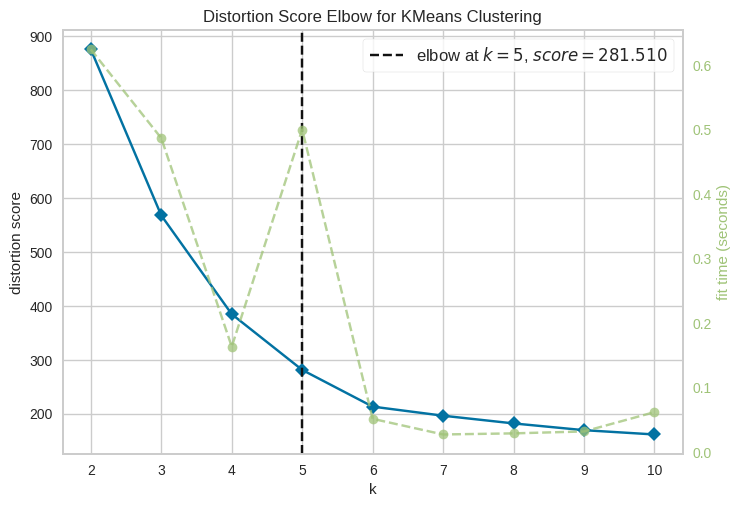

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(scaled_df1)
elbow.show()

The elbow method indicated 5 as the best number of clusters

## Using **silhouette score** to check if 5 is actually the best number of clusters

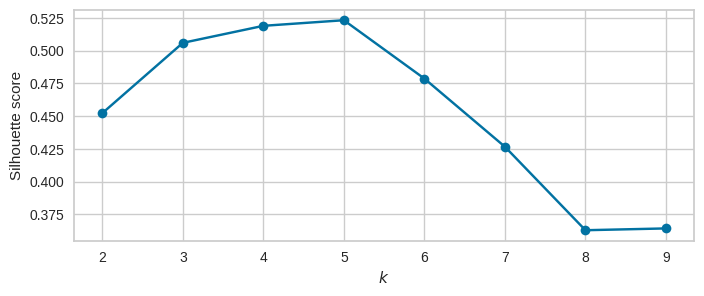

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(scaled_df1)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(scaled_df1, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [ ]:
cluster_range = range(2,10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Score for {i} clusters: ",score)

Score for 2 clusters:  0.45218231717951496
Score for 3 clusters:  0.5058522346180894
Score for 4 clusters:  0.5188449952312134
Score for 5 clusters:  0.5231185847376605
Score for 6 clusters:  0.47854091374851976
Score for 7 clusters:  0.4265177789657354
Score for 8 clusters:  0.36280822747544395
Score for 9 clusters:  0.364185349885217


Silhouette Score ensured us that 5 is the best number of clusters

## Creating a clustering model with five clusters using KMeans

In [ ]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
cluster_labels = kmeans.fit_predict(scaled_df1)
df1['cluster'] = cluster_labels
df['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Analysing each of our clusters

## The distribution of clusters

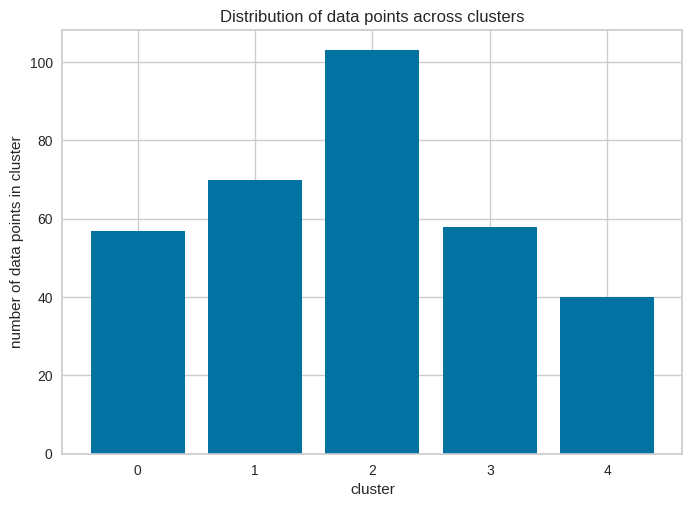

In [ ]:
cluster_distribution = df1['cluster'].value_counts().sort_index()
plt.bar(cluster_distribution.index, cluster_distribution.values)
plt.xlabel('cluster')
plt.ylabel('number of data points in cluster')
plt.title("Distribution of data points across clusters")
plt.show()

Group number 2 is the most populated one and 4 is the smallest one with just around 1/8 of all data

## Visualising clusters on 'body mass versus flipper length' plot

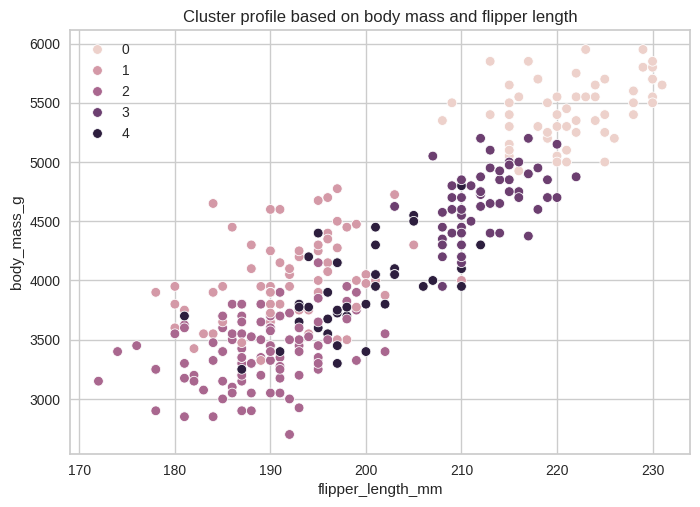

In [ ]:
sns.scatterplot(df1,x='flipper_length_mm', y='body_mass_g',hue = 'cluster')
plt.title('Cluster profile based on body mass and flipper length')
plt.legend()
plt.show()

Information about each cluster we got from this plot:

* **0:** heavy penguins with long flippers
* **1,2,4:** light penguins with shorter flippers
* **3:** penguins with flipper length and body mass in the middle  

## Plot visualising culmen length in each cluster

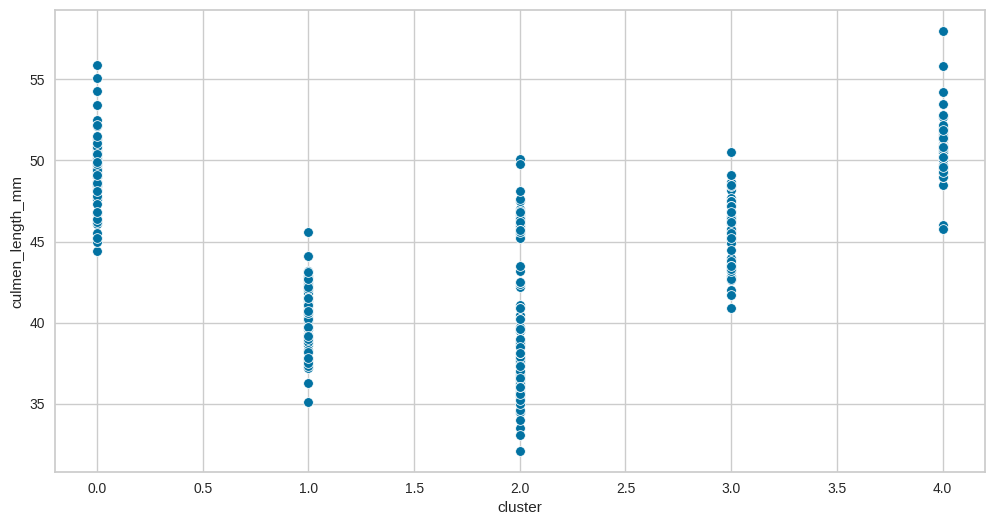

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(df1,x='cluster',y='culmen_length_mm')
plt.show()

The longest culmen appears to be in groups 0 and 4, meanwhile in other groups this indicator fluctuates between 32mm and 50mm

## Cluster division and culmen depth

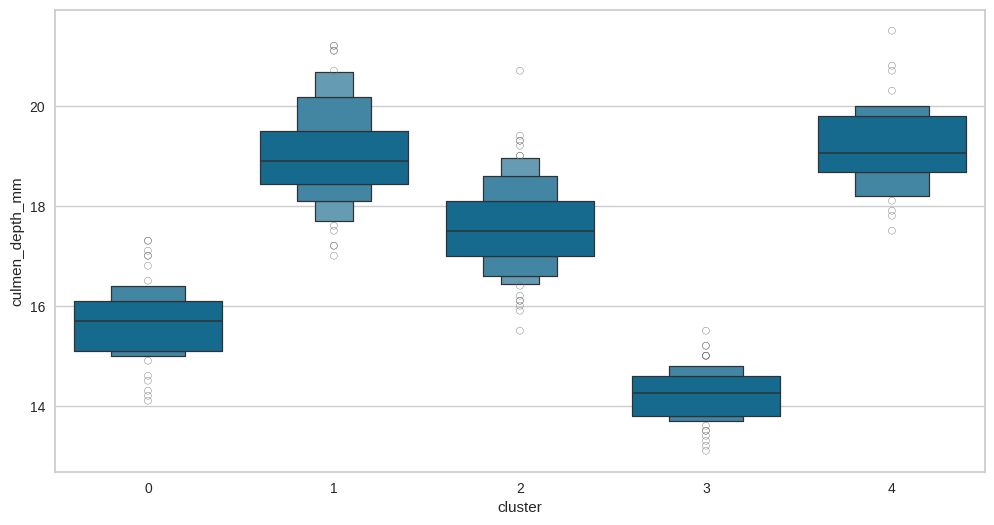

In [ ]:
plt.figure(figsize=(12,6))
sns.boxenplot(df1,x='cluster',y='culmen_depth_mm')
plt.show()

Even though culmen's length was the largest among groups 0 and 4, the culmen's depth does not correlate the same here. Group three has this significantly lower indicator than other clusters at mean level of 14. The deepest culmen have individuals in groups 1 and 4 with this number raising up to 20mm.

## Sex among different groups

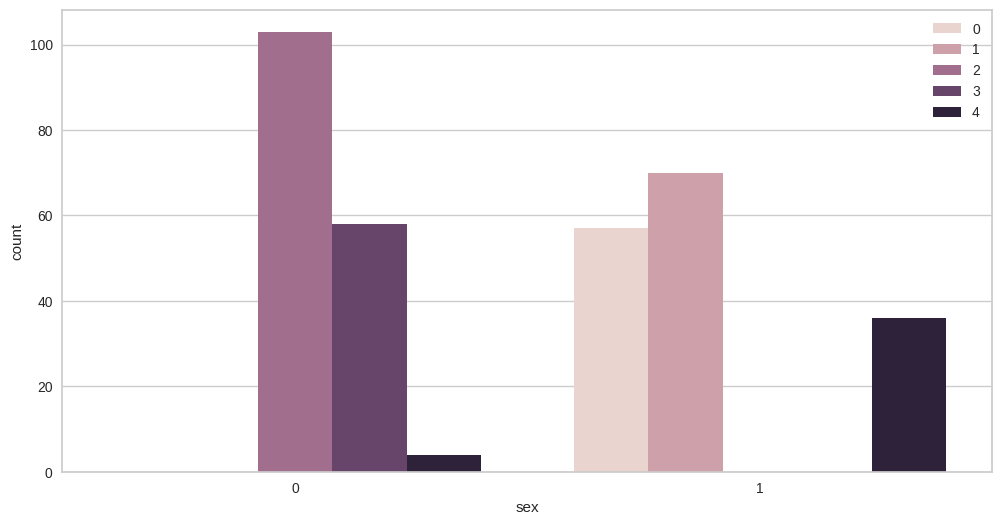

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df,x='sex', hue='cluster')
plt.legend()
plt.show()

Here data is highly divided:
* **2, 3:** conists of only Female spices
* **0, 1:** consists of only Male spices
* **4:** consits of both spices, however with a huge majority of Male ones

## Some nice plots showing different features division among clusters

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,1,1
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
4,36.7,19.3,193.0,3450.0,0,2
5,39.3,20.6,190.0,3650.0,1,1


<Figure size 1200x600 with 0 Axes>

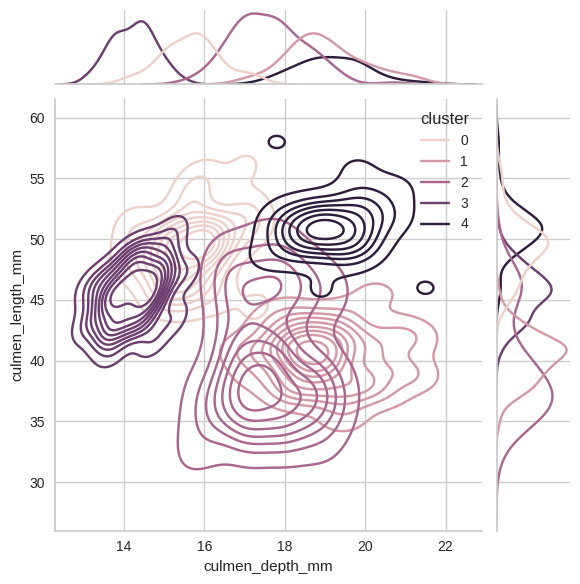

<Figure size 1200x600 with 0 Axes>

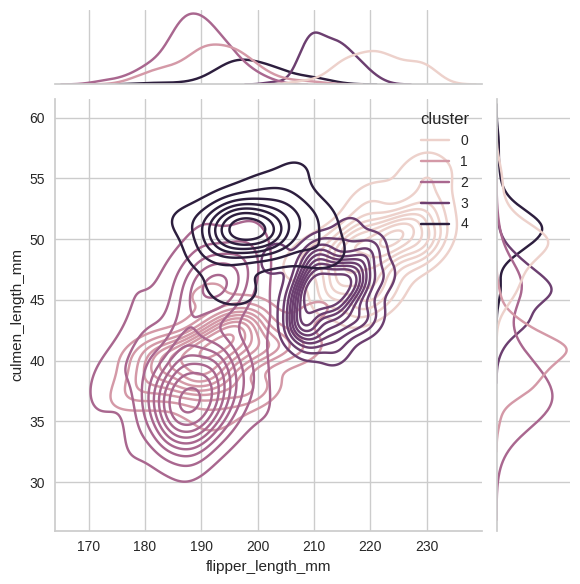

<Figure size 1200x600 with 0 Axes>

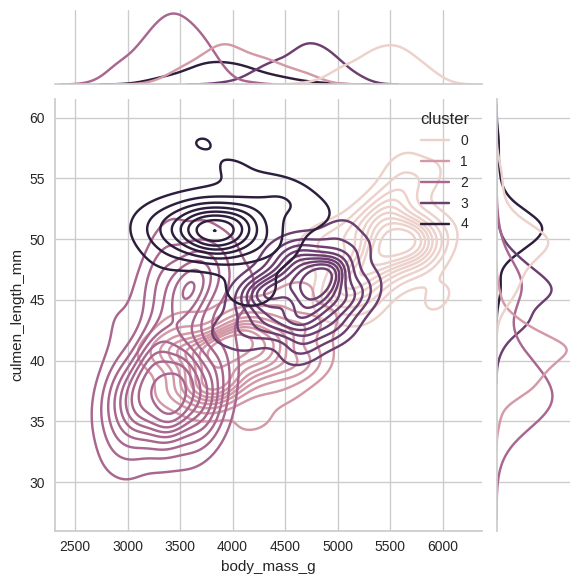

In [ ]:
features = ['culmen_depth_mm','flipper_length_mm','body_mass_g']

for i in features:
  plt.figure(figsize=(12,6))
  sns.jointplot(x=df[i],y=df['culmen_length_mm'],hue=df['cluster'],kind = 'kde')
  plt.show()

<Figure size 1200x600 with 0 Axes>

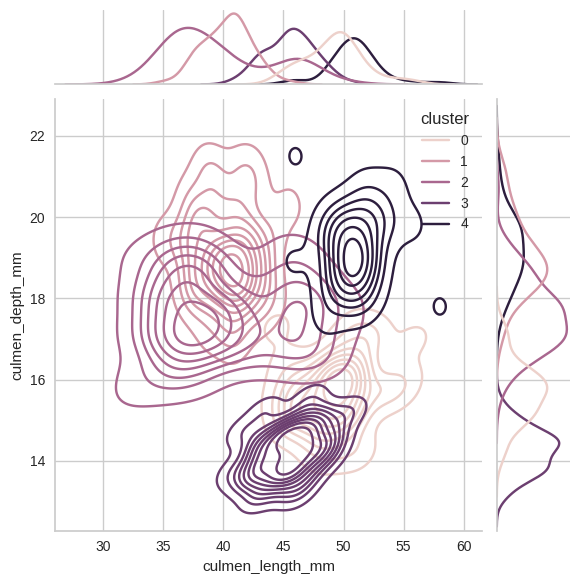

<Figure size 1200x600 with 0 Axes>

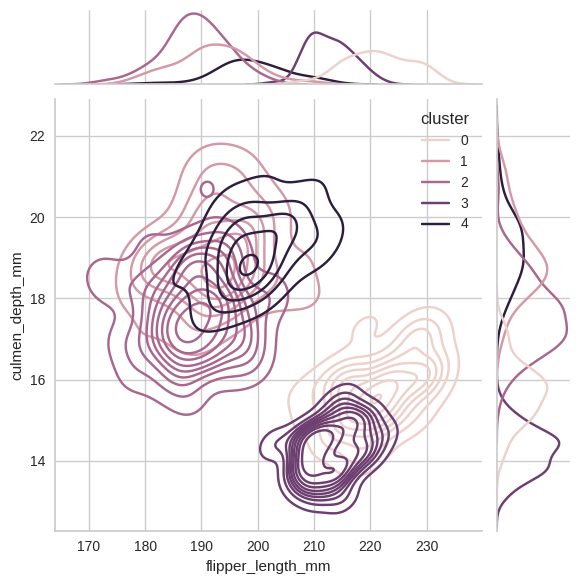

<Figure size 1200x600 with 0 Axes>

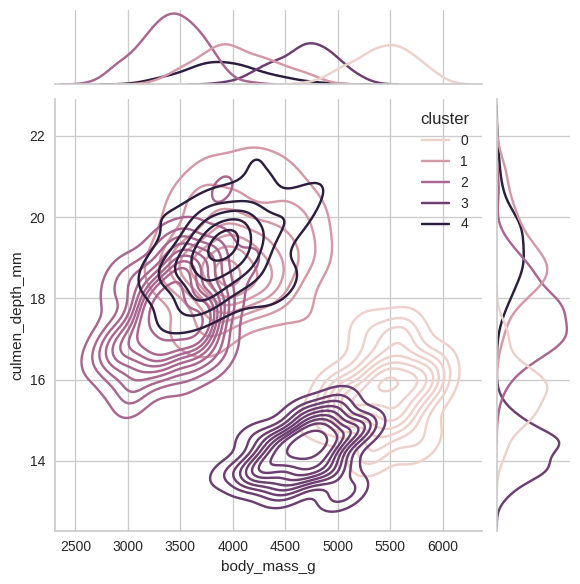

In [ ]:
features = ['culmen_length_mm','flipper_length_mm','body_mass_g']

for i in features:
  plt.figure(figsize=(12,6))
  sns.jointplot(x=df[i],y=df['culmen_depth_mm'],hue=df['cluster'],kind = 'kde')
  plt.show()

<Figure size 1200x600 with 0 Axes>

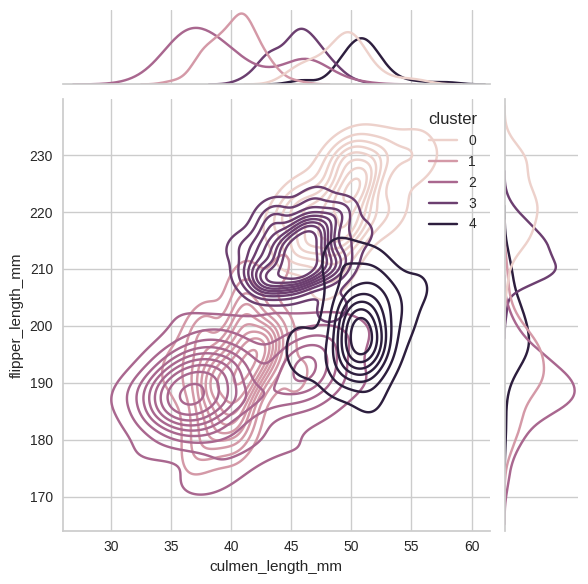

<Figure size 1200x600 with 0 Axes>

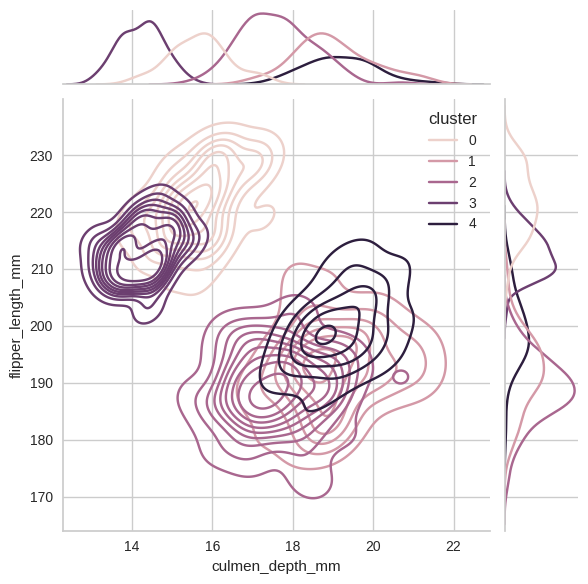

<Figure size 1200x600 with 0 Axes>

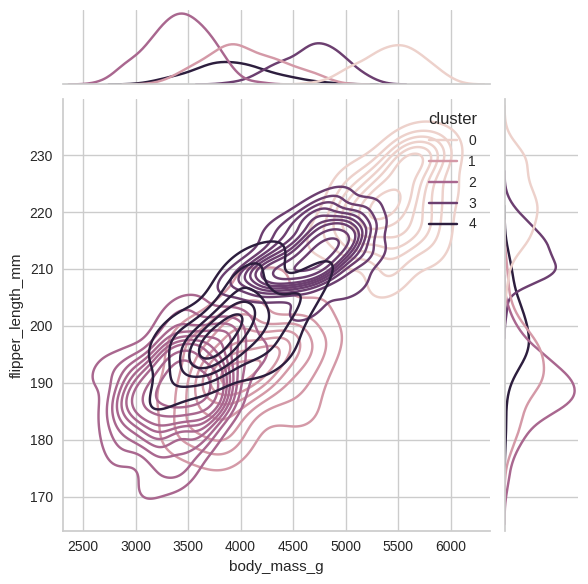

In [ ]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g']

for i in features:
  plt.figure(figsize=(12,6))
  sns.jointplot(x=df[i],y=df['flipper_length_mm'],hue=df['cluster'],kind = 'kde')
  plt.show()

<Figure size 1200x600 with 0 Axes>

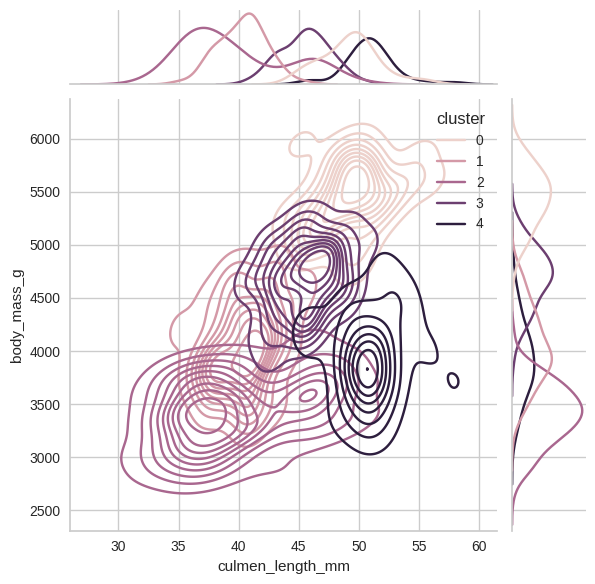

<Figure size 1200x600 with 0 Axes>

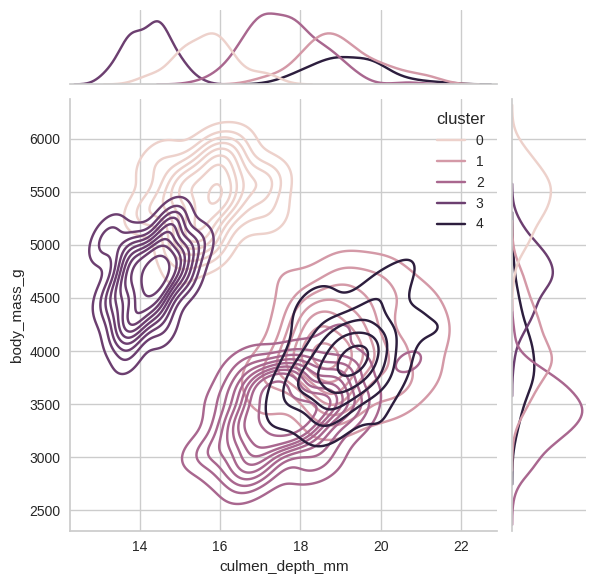

<Figure size 1200x600 with 0 Axes>

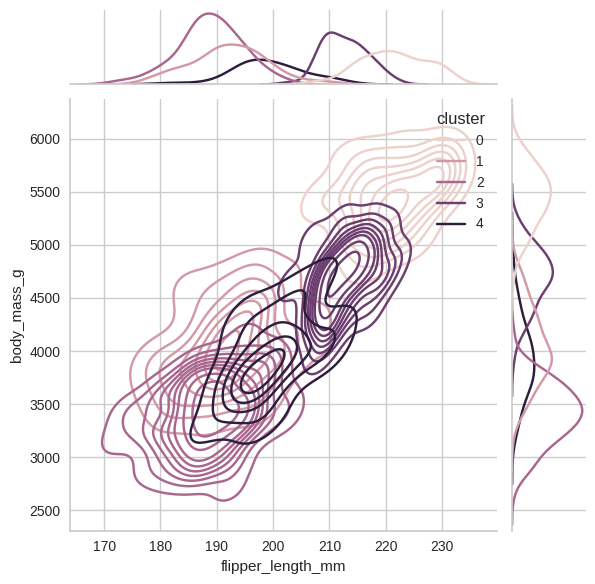

In [ ]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']

for i in features:
  plt.figure(figsize=(12,6))
  sns.jointplot(x=df[i],y=df['body_mass_g'],hue=df['cluster'],kind = 'kde')
  plt.show()

# Summary

All in all, we can differentiate five different groups of penguins with each own characteristics and features:

0. Group consisting only on Male spices. It is characterized by the significantly high body mass and long flippers. Also their culmen length is one of the longest among all different groups.

1. Group consisting only on Male spices. It's characteristic feature is culmen depth, reaching up to 21.5mm, while average is on the level of 17mm.

2. Group consisting only on Female spices. It is characterized by the very low body mass, reaching lower than half of the mas of the heaviest individuals. We can find in this cluster both the lowest value of flipper and culmen lengths.

3. Group consisting only on Female spices. Clumen depth is compareably lower than in other groups with values reaching 13.1mm with the overall average of 17.2 and the largest values of 18.7mm

4. Group consisting of both Male and Female spices, but with a large majority of Male ones. It's only characteristic feature is one of the the longest and deepest culmens.